# Load Dependencies

In [27]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [28]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)


# California Population vs Hate Crime Count

In [29]:
df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014 = (df["Year"] == 2014)
only_year_2015 = (df["Year"] == 2015)
only_year_2016 = (df["Year"] == 2016)
only_year_2017 = (df["Year"] == 2017) 

crime_2014_df = df.loc[only_year_2014]
crime_2015_df = df.loc[only_year_2015]
crime_2016_df = df.loc[only_year_2016]
crime_2017_df = df.loc[only_year_2017]


In [30]:
groupby_year_2014 = crime_2014_df.groupby(["State Abbr."])
crime_count_2014 = groupby_year_2014["Total Offender Count"].sum()
crime_count_2014 = pd.DataFrame(crime_count_2014)
crime_count_2014 = crime_count_2014.reset_index()
crime_count_2014 = crime_count_2014.rename(columns={'Total Offender Count' : '2014 Total Offender Count'})
crime_count_2014 = crime_count_2014.sort_values('2014 Total Offender Count', ascending=False)
crime_count_2014.head()


,State Abbr.,2014 Total Offender Count
4,CA,800
33,NY,626
34,OH,378
21,MI,348
18,MA,277


In [31]:
groupby_year_2015 = crime_2015_df.groupby(["State Abbr."])
crime_count_2015 = groupby_year_2015["Total Offender Count"].sum()
crime_count_2015 = pd.DataFrame(crime_count_2015)
crime_count_2015 = crime_count_2015.reset_index()
crime_count_2015 = crime_count_2015.rename(columns={'Total Offender Count' : '2015 Total Offender Count'})
crime_count_2015 = crime_count_2015.sort_values('2015 Total Offender Count', ascending=False)
crime_count_2015.head()


,State Abbr.,2015 Total Offender Count
4,CA,839
33,NY,575
34,OH,358
19,MA,317
22,MI,292


In [32]:
groupby_year_2016 = crime_2016_df.groupby(["State Abbr."])
crime_count_2016 = groupby_year_2016["Total Offender Count"].sum()
crime_count_2016 = pd.DataFrame(crime_count_2016)
crime_count_2016 = crime_count_2016.reset_index()
crime_count_2016 = crime_count_2016.rename(columns={'Total Offender Count' : '2016 Total Offender Count'})
crime_count_2016 = crime_count_2016.sort_values('2016 Total Offender Count', ascending=False)
crime_count_2016.head()


,State Abbr.,2016 Total Offender Count
4,CA,982
33,NY,628
34,OH,407
46,WA,388
21,MI,384


In [33]:
groupby_year_2017 = crime_2017_df.groupby(["State Abbr."])
crime_count_2017 = groupby_year_2017["Total Offender Count"].sum()
crime_count_2017 = pd.DataFrame(crime_count_2017)
crime_count_2017 = crime_count_2017.reset_index()
crime_count_2017 = crime_count_2017.rename(columns={'Total Offender Count' : '2017 Total Offender Count'})
crime_count_2017 = crime_count_2017.sort_values('2017 Total Offender Count', ascending=False)
crime_count_2017.head()


,State Abbr.,2017 Total Offender Count
4,CA,1014
33,NY,619
46,WA,392
34,OH,350
16,KY,344


In [34]:
#merge years
df_2014_2015_merge = pd.merge(crime_count_2014, crime_count_2015, on='State Abbr.')
df_2016_2017_merge = pd.merge(crime_count_2016, crime_count_2017, on='State Abbr.')
df_2016_2017_merge = pd.merge(df_2014_2015_merge, df_2016_2017_merge, on='State Abbr.')
df_2016_2017_merge.head()


,State Abbr.,2014 Total Offender Count,2015 Total Offender Count,2016 Total Offender Count,2017 Total Offender Count
0,CA,800,839,982,1014
1,NY,626,575,628,619
2,OH,378,358,407,350
3,MI,348,292,384,332
4,MA,277,317,243,258


In [35]:
police_count_2014_2017_df_merged = pd.merge(police_count_2014_2017_df, df_2016_2017_merge, on='State Abbr.')
df2 = pd.DataFrame(police_count_2014_2017_df_merged, columns = ['State Abbr.', '2014 Officer Count',
                                                                '2014 Total Offender Count', '2014 Population',
                                                                '2015 Officer Count', '2015 Total Offender Count',
                                                                '2015 Population', '2016 Officer Count',
                                                                '2016 Total Offender Count', '2016 Population',
                                                                '2017 Officer Count', '2017 Total Offender Count',
                                                                '2017 Population'
                                                               ])
df2

,State Abbr.,2014 Officer Count,2014 Total Offender Count,2014 Population,2015 Officer Count,2015 Total Offender Count,2015 Population,2016 Officer Count,2016 Total Offender Count,2016 Population,2017 Officer Count,2017 Total Offender Count,2017 Population
0,CA,78443.0,800,38970399,78873.0,839,39469712,79005.0,982,39454294,78740.0,1014,39713887
1,NY,62927.0,626,21799396,64142.0,575,21811666,65342.0,628,21809118,62433.0,619,21794544
2,TX,57279.0,182,27240637,57185.0,199,27801749,57831.0,195,28685684,43780.0,208,28467008
3,FL,45921.0,43,20007473,49130.0,61,20388277,49488.0,107,20750677,45976.0,196,21152963
4,GA,38723.0,50,10503162,39382.0,39,10812277,39152.0,37,10662998,24694.0,20,10885394
5,IL,34580.0,126,13023192,35886.0,94,13117464,34436.0,115,12985528,25277.0,87,12911525
6,NJ,30733.0,170,9134732,37215.0,150,9310977,33882.0,133,9005202,31341.0,194,9066144
7,PA,26947.0,49,13560937,27005.0,45,13631853,26660.0,41,13622531,25842.0,58,13598612
8,NC,26895.0,119,10646776,27886.0,157,11015159,27233.0,148,10798726,28065.0,151,11965888
9,OH,26489.0,378,13864130,29014.0,358,14137838,24713.0,407,12838704,13448.0,350,11763545


# Graph - California Population vs Crime

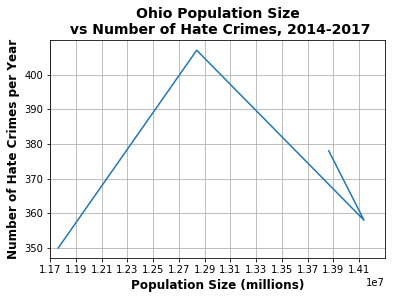

In [36]:
x_axis_pop = (df2.loc[9][3], df2.loc[9][6], df2.loc[9][9], df2.loc[9][12])
y_axis_crime = (df2.loc[9][2], df2.loc[9][5], df2.loc[9][8], df2.loc[9][11])

plt.xlim(11700000, 14300000)
plt.xticks(np.arange(11700000, 14300000, step=200000))

plt.plot(x_axis_pop, y_axis_crime)
plt.grid()

#label the graph
plt.title("Ohio Population Size\n vs Number of Hate Crimes, 2014-2017", fontsize=14, fontweight = "bold")
plt.xlabel("Population Size (millions)", fontsize=12, fontweight = "bold")
plt.ylabel("Number of Hate Crimes per Year", fontsize=12, fontweight = "bold")

plt.savefig("Images/OH_PopSize_vs_Crimes.png")

plt.show()

# Graph - California Population vs Officer Count

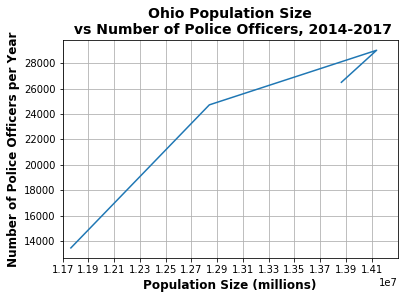

In [37]:
x_axis_pop = (df2.loc[9][3], df2.loc[9][6], df2.loc[9][9], df2.loc[9][12])
y_axis_off = (df2.loc[9][1], df2.loc[9][4], df2.loc[9][7], df2.loc[9][10])

plt.xlim(11700000, 14300000)
plt.xticks(np.arange(11700000, 14300000, step=200000))

plt.plot(x_axis_pop, y_axis_off)
plt.grid()

#label the graph
plt.title("Ohio Population Size\n vs Number of Police Officers, 2014-2017", fontsize=14, fontweight = "bold")
plt.xlabel("Population Size (millions)", fontsize=12, fontweight = "bold")
plt.ylabel("Number of Police Officers per Year", fontsize=12, fontweight = "bold")

plt.savefig("Images/OH_PopSize_vs_Officers.png")

plt.show()

# Dual Axis Chart

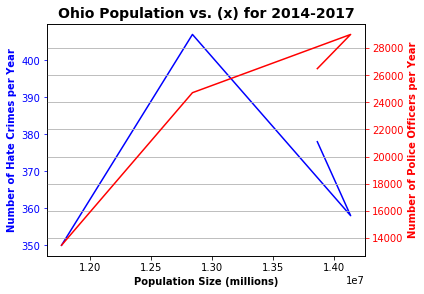

In [38]:
#dual axis chart

fig, ax1 = plt.subplots()
ax1.plot(x_axis_pop, y_axis_crime, 'b')
ax1.set_xlabel("Population Size (millions)", fontweight = "bold")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel("Number of Hate Crimes per Year", color='b', fontweight = "bold")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_axis_pop, y_axis_off, 'r')
ax2.set_ylabel("Number of Police Officers per Year", color='r', fontweight = "bold")
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.grid()

plt.title("Ohio Population vs. (x) for 2014-2017", fontsize=14, fontweight = "bold")

plt.savefig("Images/OH_PopSize_dual_axis.png")

plt.show()